Install packages

In [1]:
!pip install dash

     |████████████████████████████████| 7.3 MB 4.3 MB/s 
     |████████████████████████████████| 23.9 MB 12 kB/s 
     |████████████████████████████████| 357 kB 54.1 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3821 sha256=8a3e4c5b63262a3df976115ea5935bde1aaef48b3d6a55d1aac2657763e388f7
  Stored in directory: /root/.cache/pip/wheels/00/f9/c7/1a6437d794ed753ea9bc9079e761d4fc803a1f1f5d3697b9ec
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4089 sha256=322185485af8e78fc2a000c175c093a0c034cf9da98105e5ddad9140caa459c3
  Stored in directory: /root/.cache/pip/wheels/ec/6b/81/05aceabd8b27f724e2c96784016287cc1bfbc349ebfda451de
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3911 sha256=eda81fe4bb2f8d709b1b3e0184fb753330403241deb239f773e7bea373887448
  Stored in directory: /root/.cache/pip/wheels/85/5d/4e/7c276b57992951dbe770bf5caad6448d0539c510663aefd

Download seismic and interpretations:

In [2]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1-gpxnUcvLKhn43CJdzjyAotDPj18pydD',
                                    dest_path='/content/interp.db',
                                    unzip=False)

gdd.download_file_from_google_drive(file_id='1JqqYbaryyUBsgWVwzLu_PStpnhGarI5q',
                                    dest_path='/content/S1.jpg',
                                    unzip=False)

Load packages

In [3]:
import dash
import cv2
import json
import os.path
import time
import random
import math
from dash import dcc
import dash_html_components as html
import numpy as np
from os import path
from PIL import Image
from skimage import io
from scipy import sparse
from scipy.stats import uniform
from sqlalchemy import MetaData, Table, Column, String
from sqlalchemy import Integer, create_engine, select
from dash.dependencies import Input, Output, State
from dash_table import DataTable
from dash.exceptions import PreventUpdate

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`


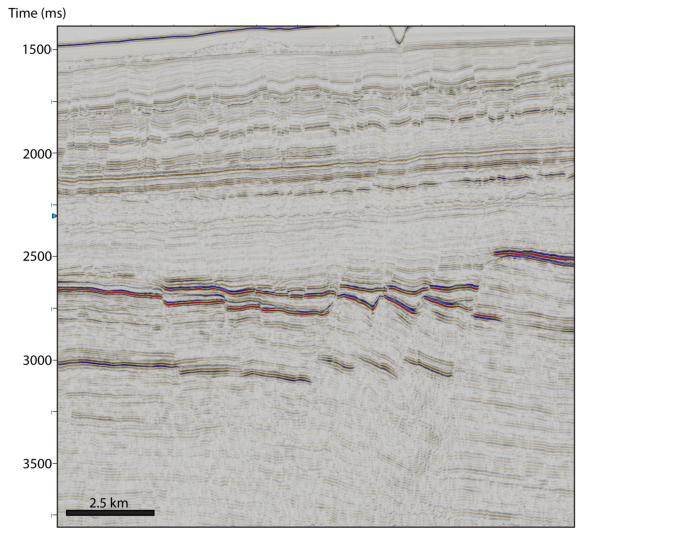

In [16]:
seismic = mpimg.imread('S1.jpg')

plt.figure(figsize=(12,12))
plt.imshow(seismic)
plt.axis('off')
plt.show()

Connect database:

In [7]:
metadata = MetaData()
clean_data_table = Table('interps', metadata,
                    Column('id', Integer, primary_key=True),
					          Column('num', Integer),
                    Column('experience', Integer),
                    Column('sparserow', String(1e6)),
                    Column('sparsecol', String(1e6)),
					          Column('timetaken', String(30)),
					          Column('image', String(3)))

engine = create_engine("sqlite:///interp.db")
metadata.create_all(engine)
conn = engine.connect()

Get interpretations from different interpreters:

In [9]:
inimg = 'S1'

resx = seismic.shape[0]
resy = seismic.shape[1]
select_stmt = select([clean_data_table.c.sparserow, clean_data_table.c.sparsecol]).where(clean_data_table.c.image == inimg)
conn = engine.connect()
result = conn.execute(select_stmt)

interpretations = []
for row in result:

  interpretation = np.zeros((resx, resy))

  maskrow = np.array(row.sparserow.split(',')).astype(int)
  maskcol = np.array(row.sparsecol.split(',')).astype(int)
  for i in range(len(maskrow)):
    interpretation[maskrow[i]][maskcol[i]] += 1

  interpretations.append(interpretation)



Exception during reset or similar
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/pool/base.py", line 739, in _finalize_fairy
    fairy._reset(pool)
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/pool/base.py", line 988, in _reset
    pool._dialect.do_rollback(self)
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/default.py", line 667, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140419094517632 and this is thread id 140418443237120.
Exception closing connection <sqlite3.Connection object at 0x7fb59bca0810>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/pool/base.py", line 739, in _finalize_fairy
    fairy._reset(pool)
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/pool/base.py", line 988, in _reset
    pool._dialect.do_rol

Look at data:

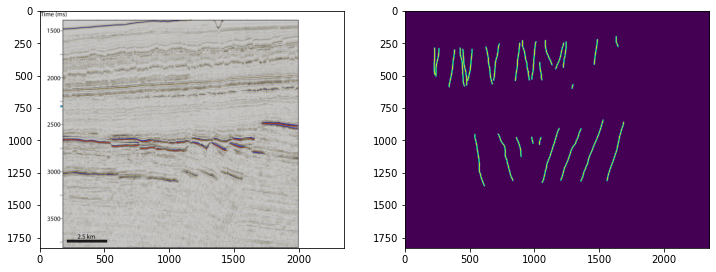

In [24]:
fig, axs = plt.subplots(1,2, figsize=(12,12))
axs[0].imshow(seismic)
axs[1].imshow(interpretations[0])
plt.show()

Nice overlay:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

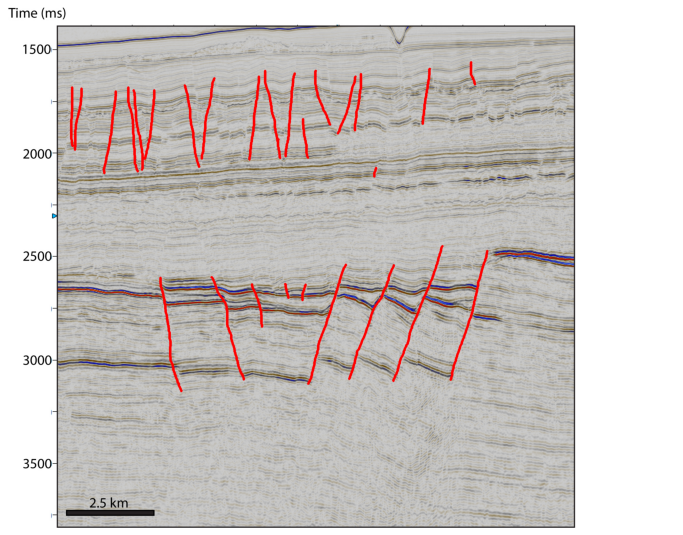

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

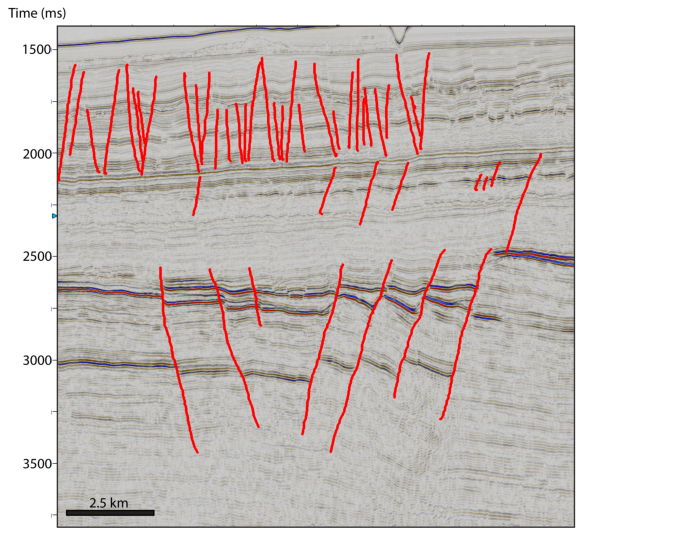

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

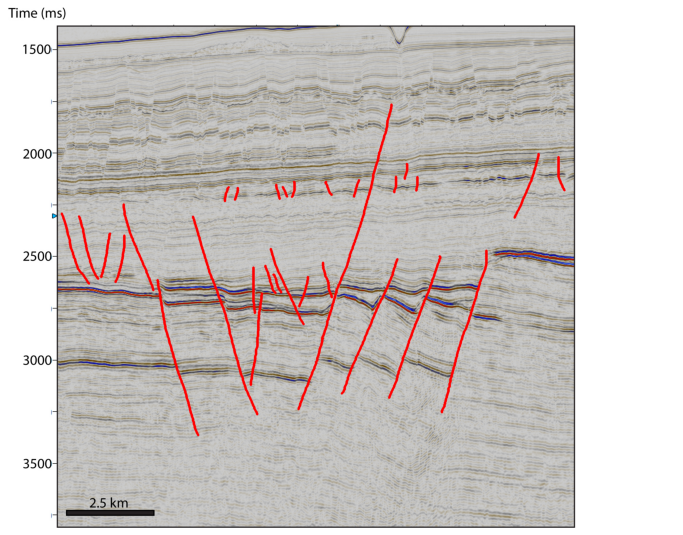

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

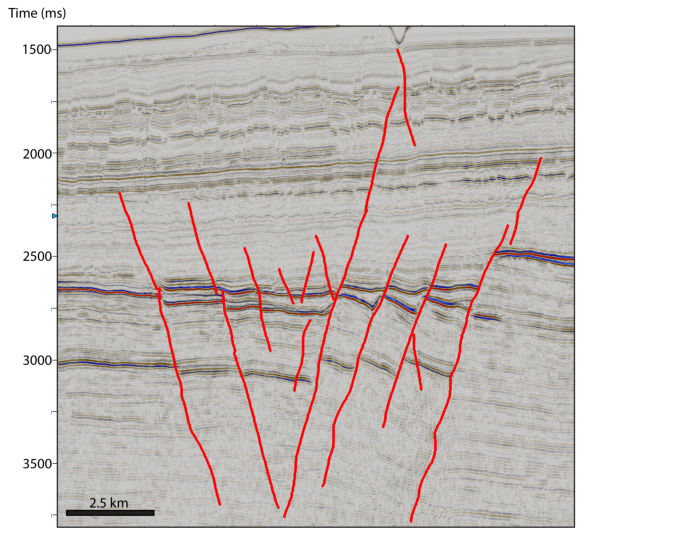

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

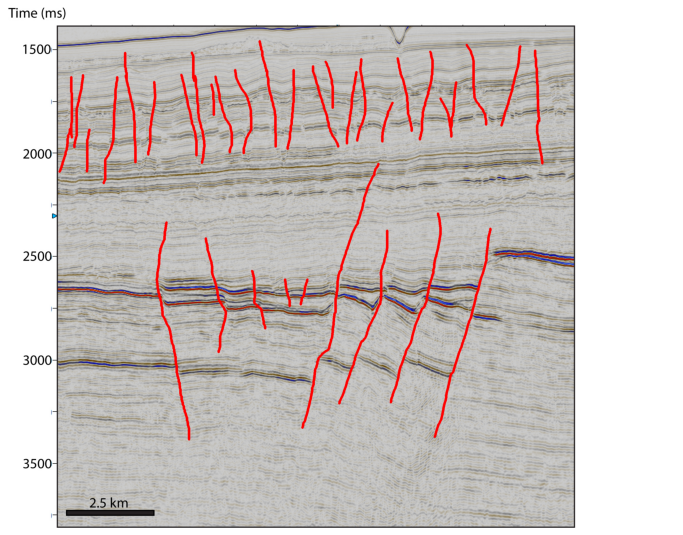

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

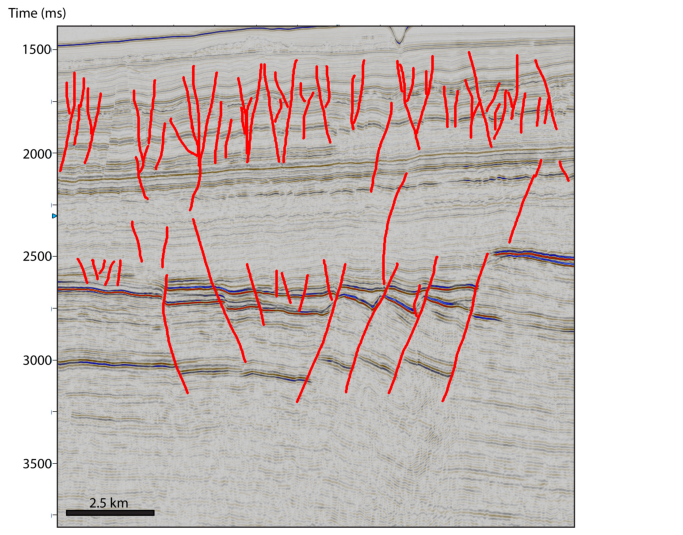

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

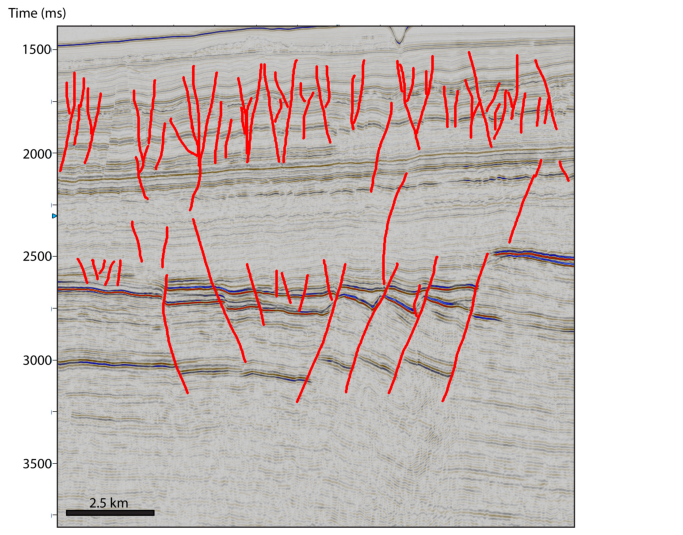

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

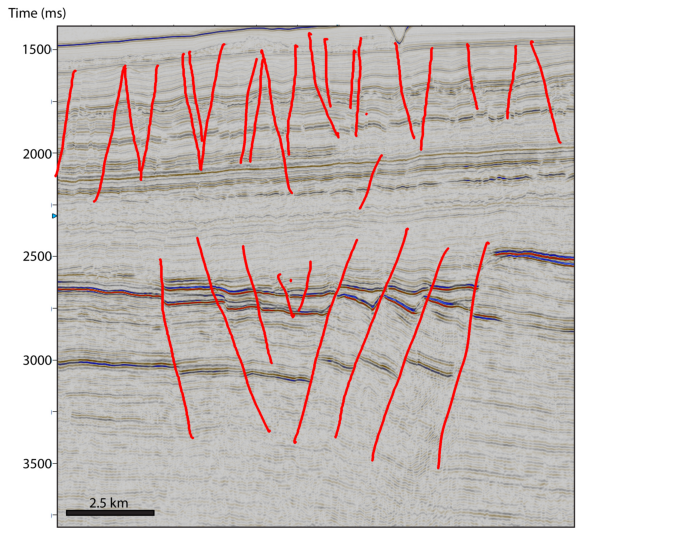

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

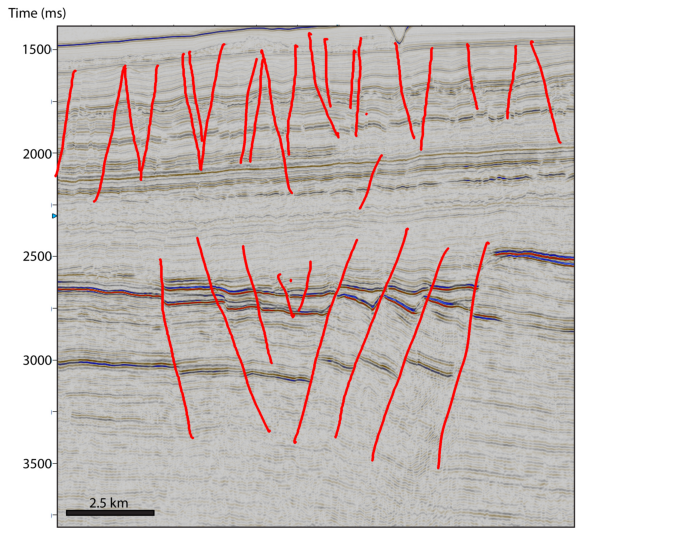

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

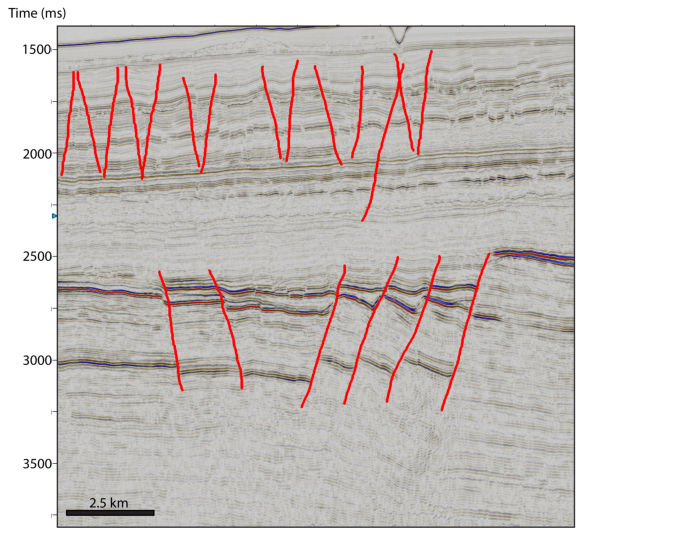

<IPython.core.display.Javascript object>

In [17]:
def plot_overlay(image, label):
    (tmax, xmax, _) = image.shape

    label_rgb = np.zeros((tmax,xmax,4), 'uint8')
    label_rgb[:,:,0] = 255
    label_rgb[:,:,1] = 255 - 255*label
    label_rgb[:,:,2] = 255 - 255*label
    label_rgb[:,:,3] = 255*label   
    
    img = Image.fromarray(label_rgb, mode='RGBA')
    
    image_rgb = np.zeros((tmax,xmax,4), 'uint8')    
    image_rgb[:,:,0] = image[:,:,0] 
    image_rgb[:,:,1] = image[:,:,1] 
    image_rgb[:,:,2] = image[:,:,2] 
    image_rgb[:,:,3] = 255
    
    background = Image.fromarray(image_rgb, mode='RGBA')    
    background.paste(img, (0, 0), img)

    plt.imshow(background)
    plt.xticks([])
    plt.yticks([])


from google.colab import widgets
tb = widgets.TabBar([str(i) for i in range(10)])

for i in range(10): 
  with tb.output_to(i):
    plt.figure(figsize=(12,12))
    plot_overlay(seismic, interpretations[i])
    plt.axis('off')
    plt.show()



In [ ]:
# create bounding boxes

import cv2
import matplotlib.patches as patches

binary = np.where(interpretations[0]>0,1,0).astype('uint8')

# getting mask with connectComponents
ret, labels = cv2.connectedComponents(binary)

fig, ax = plt.subplots(1, 1, figsize=(12,12))

for label in range(1,ret):
    mask = np.array(labels, dtype=np.uint8)
    mask[labels == label] = 1
    ax.imshow(mask)

contours = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
for cnt in contours:
    (x,y,w,h) = cv2.boundingRect(cnt)

    # Create a Rectangle patch
    rect = patches.Rectangle((x-16, y-16), w+32, h+32, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()